In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier #bagging
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc

In [ ]:
dataset = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
#Describe the data
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#17600 records
dataset.shape

(2200, 8)

In [ ]:
#Check NaN Values
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
dataset.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


DEFINE X and Y

In [ ]:
#splitting into 7 feature cols and 1 target cols
x= dataset.iloc[:,:-1]

y = dataset.iloc[:,-1]

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Normalizing using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)


BUILDING THE ML MODELS

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=9,random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
rf_acc=accuracy_score(y_test,y_pred) #compares the original y_test to the y pred value


In [ ]:
print("Accuracy for Random Forest: ",rf_acc)
print("\n\n")

Accuracy for Random Forest:  0.9840909090909091





SUPPORT VECTOR MACHINE


In [ ]:
svm = SVC(probability=True,kernel = 'linear', random_state =1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm_acc=accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy for SVM: ",svm_acc)
print("\n\n")

Accuracy for SVM:  0.9840909090909091





BAGGING

In [ ]:
estimators = []
model1=  RandomForestClassifier()
estimators.append(('RandomForest', model1))
ensemble = VotingClassifier(estimators,voting='soft') #bagging ensembLe
eclf1 = ensemble.fit(X_train,y_train)
y_pred=eclf1.predict(X_test)

In [ ]:
ens_acc=accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy for Bagging Method: ",ens_acc)
print("\n\n")

Accuracy for Bagging Method:  0.990909090909091





LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1) # get instance of model
lr.fit(X_train, y_train) # Train/Fit model
y_pred = lr.predict(X_test) # get y predictions


In [ ]:
lr_acc=accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy for Logistic Regression: ",lr_acc)
print("\n\n")

Accuracy for Logistic Regression:  0.9659090909090909





In [ ]:
x=['Random Forest','SVM','Bagging','Logistic Regression']
yacc=[rf_acc,svm_acc,ens_acc,lr_acc]

In [ ]:
data = {'Algorithms':x,
        'Accuracy':yacc,
        }

In [ ]:
df_acc=pd.DataFrame(data)#visualize data frame
df_acc.head(5)

,Algorithms,Accuracy
0,Random Forest,0.984091
1,SVM,0.984091
2,Bagging,0.990909
3,Logistic Regression,0.965909


In [ ]:
df_acc.to_csv('Accuracy.csv',index=True)

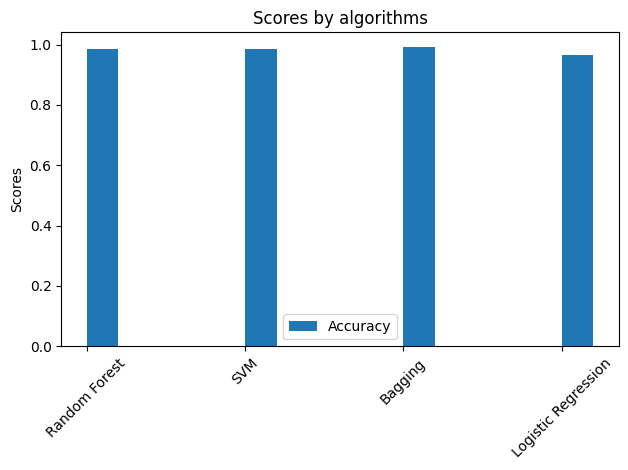

In [ ]:
labels = df_acc['Algorithms']
acc = df_acc['Accuracy']


x = np.arange(len(labels))  # the label locations
w = 0.6
dimw = w / 3
fig, ax = plt.subplots()
rects1 = ax.bar(x+1*dimw, acc, dimw, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithms')
ax.set_xticks(x + dimw / 2)#ehat id dimw
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:

N=input('Enter N:')
P=input('Enter P:')
K=input('Enter k:')
pH=input('Enter PH:')
temp=input('Enter temperature:')
humidity=input('Enter humidity:')
rainfall=input('Enter rainfall: ')
Output=ensemble.predict([[

                   float(N),
                   float(P),
                   float(K),
                   float(pH),
                   float(temp),
                   float(humidity),
                   float(rainfall)
                   ]])
print(Output)
print('Fertility Production:',Output)

Enter N:60
Enter P:50
Enter k:55
Enter PH:6.457256
Enter temperature:20.495378
Enter humidity:80.489246
Enter rainfall: 242.864799
['apple']
Fertility Production: ['apple']
